# Contraceptive Method Choice Dataset

## by Samuel Abati

## Introduction

    The contraceptive method choice dataset comprises 1473 instances.

The dataset has 10 attributes.

    Attribute Information:

    Wife's age (numerical)

    Wife's education (categorical) 1=low, 2, 3, 4=high

    Husband's education (categorical) 1=low, 2, 3, 4=high

    Number of children ever born (numerical)

    Wife's religion (binary) 0=Non-Islam, 1=Islam

    Wife's now working? (binary) 0=Yes, 1=No

    Husband's occupation (categorical) 1, 2, 3, 4

    Standard-of-living index (categorical) 1=low, 2, 3, 4=high

    Media exposure (binary) 0=Good, 1=Not good

    Contraceptive method used (class attribute) 1=No-use ,2=Long-term,3=Short-term

The samples are married women who were either not
pregnant or do not know if they were at the time of interview.

## Preliminary Wrangling

In [81]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

%matplotlib inline

    In this section, the goal is to load the dataset and its structure and perform prelimiinary wrangling if needed. That is further cleaning, to ensure the data is tidy.

In [2]:
#load in the dataset into a pandas dataframe and check its structure
df = pd.read_csv('cmc.data.txt', names=["Wife's age", "Wife's education", "Husband's education", "Number of children ever born", "Wife's religion", "Wife's now working?", "Husband's occupation", "Standard-of-living index", "Media exposure", "Contraceptive method used" ])


In [3]:
#high-level overview of data shape and composition
print(df.shape)
print(df.dtypes)
print(df.head(10))

(1473, 10)
Wife's age                      int64
Wife's education                int64
Husband's education             int64
Number of children ever born    int64
Wife's religion                 int64
Wife's now working?             int64
Husband's occupation            int64
Standard-of-living index        int64
Media exposure                  int64
Contraceptive method used       int64
dtype: object
   Wife's age  Wife's education  Husband's education  \
0          24                 2                    3   
1          45                 1                    3   
2          43                 2                    3   
3          42                 3                    2   
4          36                 3                    3   
5          19                 4                    4   
6          38                 2                    3   
7          21                 3                    3   
8          27                 2                    3   
9          45                 1    

In [4]:
#converting all qualitative variables into object data types
df[["Wife's education", "Husband's education", "Husband's occupation", "Standard-of-living index", "Wife's religion", "Wife's now working?", "Media exposure", "Contraceptive method used"]] = df[["Wife's education", "Husband's education", "Husband's occupation", "Standard-of-living index", "Wife's religion", "Wife's now working?", "Media exposure", "Contraceptive method used"]].astype("category")

In [5]:
# checking for any missing values
df.isnull().sum()

Wife's age                      0
Wife's education                0
Husband's education             0
Number of children ever born    0
Wife's religion                 0
Wife's now working?             0
Husband's occupation            0
Standard-of-living index        0
Media exposure                  0
Contraceptive method used       0
dtype: int64

    There are no missing values in the data provided

In [6]:
# checking for duplicated rows
df.duplicated().sum()

48

    Looks like there's quite a number of duplicated rows. These duplicates add no new value to our analysis nor the model building so they will be dropped.

In [7]:
# dropping the duplicates
df = df.drop_duplicates()

In [8]:
#Checking to see all the wrangling performed
print(df.shape)
print(df.dtypes)
print(df.head(5))

(1425, 10)
Wife's age                         int64
Wife's education                category
Husband's education             category
Number of children ever born       int64
Wife's religion                 category
Wife's now working?             category
Husband's occupation            category
Standard-of-living index        category
Media exposure                  category
Contraceptive method used       category
dtype: object
   Wife's age Wife's education Husband's education  \
0          24                2                   3   
1          45                1                   3   
2          43                2                   3   
3          42                3                   2   
4          36                3                   3   

   Number of children ever born Wife's religion Wife's now working?  \
0                             3               1                   1   
1                            10               1                   1   
2                          

In [9]:
#Checking the statistics of the dataset using describe()
df.describe()

,Wife's age,Number of children ever born
count,1425.000000,1425.000000
mean,32.504561,3.284912
std,8.215933,2.377671
min,16.000000,0.000000
25%,26.000000,1.000000
50%,32.000000,3.000000
75%,39.000000,5.000000
max,49.000000,16.000000


## Dataset Structure:

The dataset initially had 1473 rows and 10 columns.

    I converted columns with categorical attributes into categorical object types.

    There were no missing values in the data provided but some rows were duplicated, 48 in numbers. 

    These rows were dropped as they add no additional value to our analysis.

## Main Features of interest in the dataset:

    This dataset has a lot of interesting features that I believe would be worthwile to explore, so I will be exploring most.

    The Features are the Wife's age, Wife's education, Husband's education, Number of children ever born, Wife's religion, Wife's now working?, Husband's occupation, Standard-of-living index, and Media exposure.

## Univariate Exploration:

    In this section, we will be investigating distributions of individual variables.

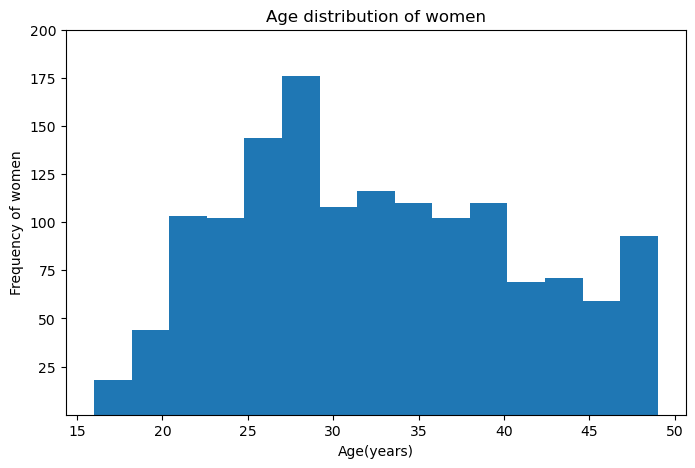

In [10]:
#setting figure size
plt.figure(figsize =[8,5])
#setting ticks and labels
ticks=[25,50,75,100,125,150,175,200]
labels=['25','50','75','100','125','150','175','200']
#using a standard scaled Hist plot
plt.hist(data= df, x ="Wife's age",bins= 15)
plt.yticks(ticks,labels)
#setting title and  axis label
plt.title('Age distribution of women')
plt.ylabel('Frequency of women')
plt.xlabel('Age(years)')
plt.show()

### Observation:

    There seems to be no outliers in this dataset. The distribution appears to be a unimodal one with a peak between 25 and 30 years.

In [11]:
df["Wife's age"].mode()

0    25
Name: Wife's age, dtype: int64

    But using the pandas method ".mode()" gives the mode as 25 years.

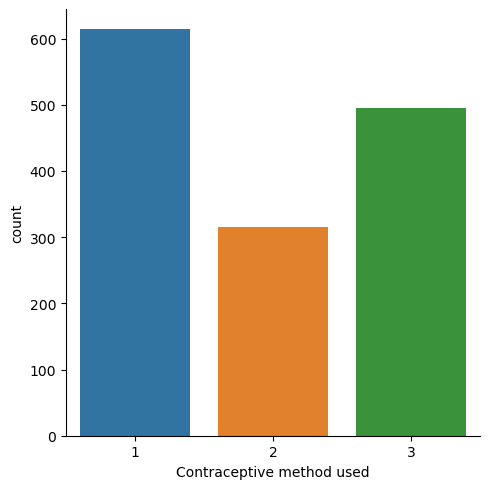

In [12]:
#plotting univariate plot for Contraceptive method used
sns.catplot(x="Contraceptive method used", data=df, kind='count');

### Observation:

    It appears most women (>600) don't use any form of contraception, and of those who do, a greater number use only for a short period of time.

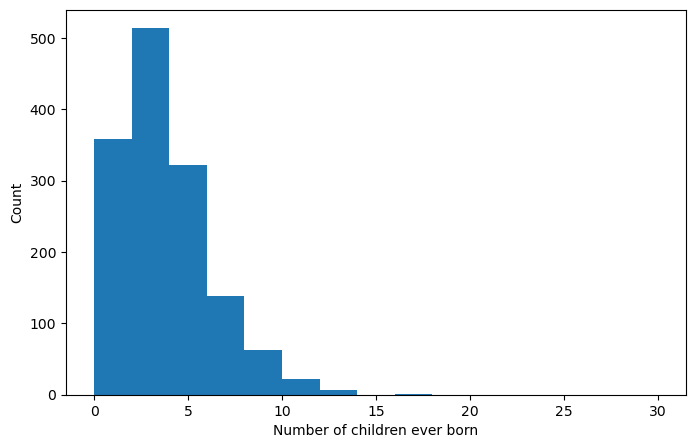

In [13]:
plt.figure(figsize = [8,5])

binsize = 2
bins = np.arange(0,30+binsize,binsize)
plt.hist(data=df,x='Number of children ever born',bins = bins)
plt.xlabel('Number of children ever born')
plt.ylabel('Count');

### Observation:

    From the plot, the Number of children ever born to the women has a unimodal distribution with most of the wonen having betwwen 0 and 5 children. The plot also spikes around 3 and 4 children.

## Univariate Exploration Summary:

    After Univariate exploration of the variables of my interest, I discovered interesting patterns in some of the variables, such as the Wife's age, Contraceptive method used, and the Number of children ever born. Which I will further explore to see relationshps in some. I did not see a need to carry out any major transformations to see the pattern in the variabes properly.

## Bivariate  Exploration:

    In this section, I will investigate relationships between pairs of variables in the data.
    
    To start with, I will be plotting "Wife's age" attribute against the "Contraceptive method used" atttibute.

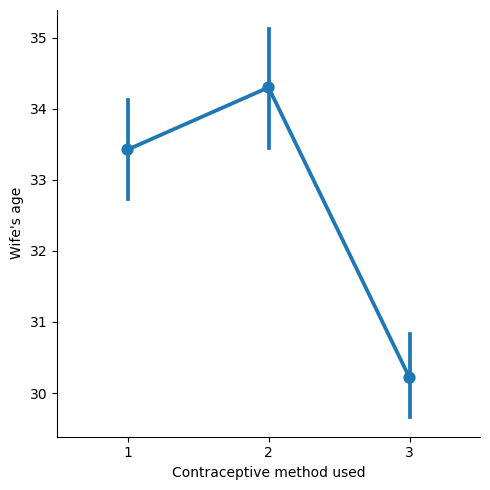

In [14]:
sns.catplot(x="Contraceptive method used", y="Wife's age", data=df, kind='point');

### Observation:

    From the plot above, of those who use contraceptives,  younger-aged women tend to use long-term contraceptives while older-aged women use mostly short-term forms.

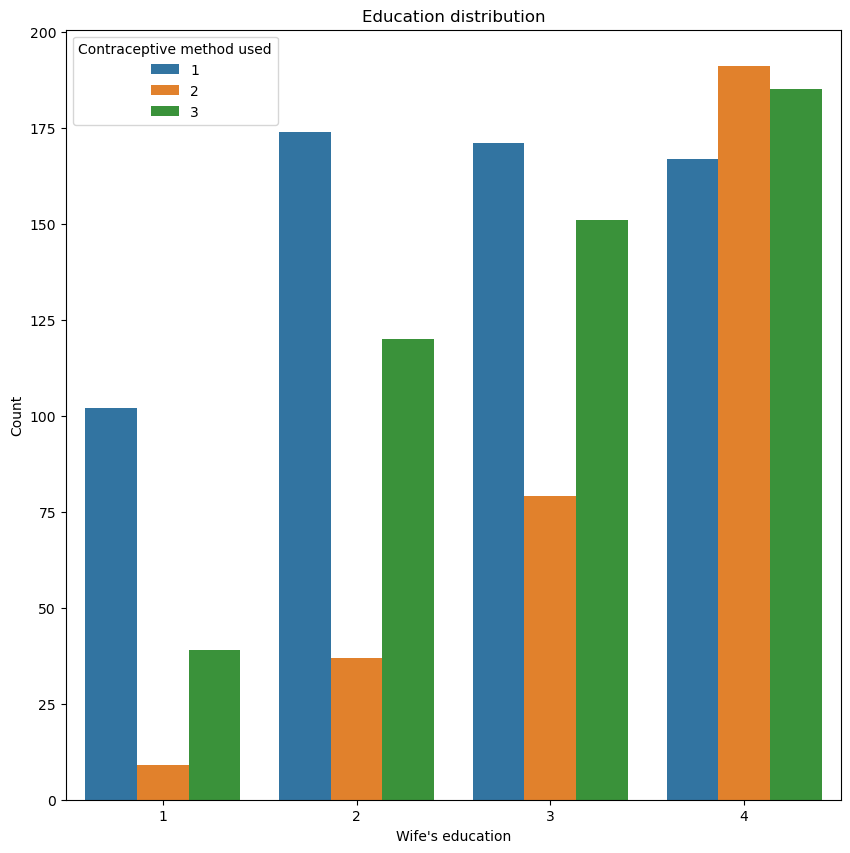

In [15]:
plt.figure(figsize = [10,10])
#using seaborns countplot 
sns.countplot(data = df,x="Wife's education",hue="Contraceptive method used")
#setting axis labels
plt.title('Education distribution')
plt.xlabel("Wife's education")
plt.ylabel('Count');

### Observation:

    Though there is no exact description of the education attributes, the higher the number the higher the educational level.

    It appears that the more educated the woman, the higher the likelihood of her using a contraceptive. This stands to reason ofcourse, since with more education comes the knowledge of the benefits of using contraceptives.

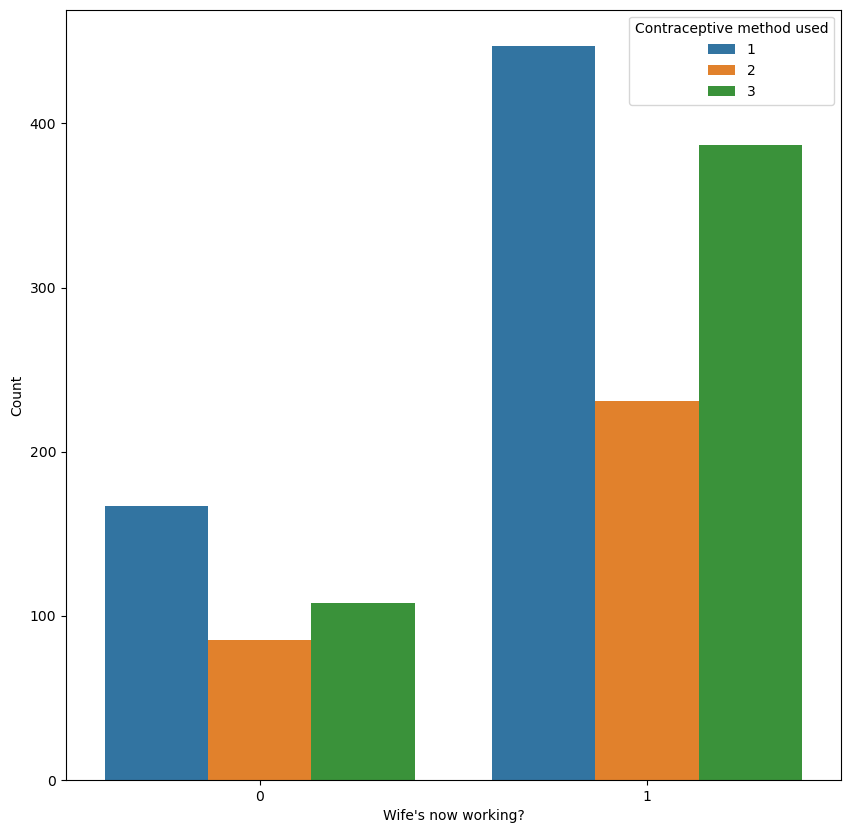

In [16]:
plt.figure(figsize = [10,10])
#using seaborns countplot 
sns.countplot(data = df,x="Wife's now working?",hue="Contraceptive method used")
#setting axis labels
plt.xlabel("Wife's now working?")
plt.ylabel('Count');

## 0bservation:

    From my observation of this plot, the samples aren't even distributed amongst women now working and those who aren't, so there doesnt really seem to be a significant relationship or difference in the distribution when compared to contraceptive use.

## Bivariate Exploration Summary:

    The age of the women and the contaceptive method used have an interesting relationship. It turns out younger women used long-term contraceptives when compared with older women who tend to use short-term contaceptives. Then again, it may just be a coincidence as a result of the sample used to prepare the dataset.
    
    I also discovered that the more educated the woman, the higher the likelihood of her using a contraceptive.

# Model Building

## Linear SVC

In [37]:
#creating the x variable
x = df.drop(columns =['Contraceptive method used']).values


In [38]:
#creating the y variable
y = df['Contraceptive method used'].values

In [39]:
#splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state= 42)

In [40]:
#fitting the model for Linear SVC model
linear_svc = LinearSVC()
linear_svc.fit(x_train,y_train)

C:\Users\DELL\Desktop\nlp\env\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [41]:
#calculating the predicted values
predictions = linear_svc.predict(x_test)


In [42]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.67      0.40      0.51       178
           2       0.37      0.75      0.50       102
           3       0.54      0.41      0.46       148

    accuracy                           0.49       428
   macro avg       0.53      0.52      0.49       428
weighted avg       0.55      0.49      0.49       428



## K Nearest Neighbours

In [73]:
neigh = KNeighborsClassifier(n_neighbors=25)
neigh.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=25)

In [74]:
#calculating the predicted values
predictions_n = neigh.predict(x_test)

In [75]:
print(classification_report(y_test, predictions_n))

              precision    recall  f1-score   support

           1       0.59      0.64      0.62       178
           2       0.50      0.31      0.39       102
           3       0.51      0.59      0.55       148

    accuracy                           0.55       428
   macro avg       0.54      0.52      0.52       428
weighted avg       0.54      0.55      0.54       428



## Random Forest Classifier

In [78]:
clf = RandomForestClassifier(n_estimators=10)
clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10)

In [79]:
#calculating the predicted values
predictions_c = clf.predict(x_test)

In [80]:
print(classification_report(y_test, predictions_c))

              precision    recall  f1-score   support

           1       0.57      0.59      0.58       178
           2       0.41      0.31      0.35       102
           3       0.47      0.53      0.50       148

    accuracy                           0.50       428
   macro avg       0.48      0.48      0.48       428
weighted avg       0.50      0.50      0.50       428



## Gradient Boosting Classifier

In [82]:
model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(x_train, y_train)

In [85]:
#calculating the predicted values
predictions_m = model.predict(x_test)

In [86]:
print(classification_report(y_test, predictions_m))

              precision    recall  f1-score   support

           1       0.68      0.66      0.67       178
           2       0.50      0.35      0.41       102
           3       0.53      0.66      0.59       148

    accuracy                           0.59       428
   macro avg       0.57      0.56      0.56       428
weighted avg       0.59      0.59      0.58       428

